In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [25]:
#path_img = 'mri_bone/mri_bone'
path_img = 'whale'

In [26]:
data = ImageDataBunch.from_folder(path_img,train = 'train',valid='valid', size=320, bs=bs).normalize(imagenet_stats)

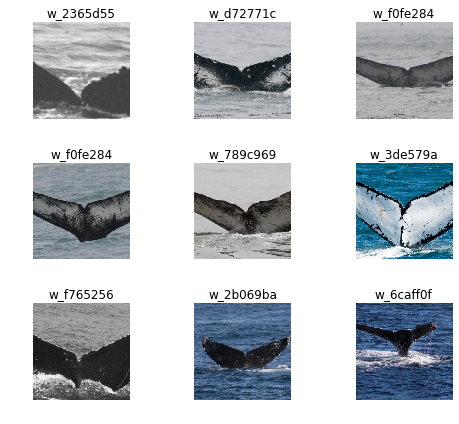

In [27]:
data.show_batch(rows=3, figsize=(7,6))

In [28]:
print(data.classes)
len(data.classes),data.c

['w_0369a5c', 'w_04003e9', 'w_08630fd', 'w_17b0d3a', 'w_1ca9ab1', 'w_2365d55', 'w_23a388d', 'w_2b069ba', 'w_343f088', 'w_3de579a', 'w_51fc1fc', 'w_564a34b', 'w_59052ad', 'w_5a2634c', 'w_5e8e218', 'w_60ce6fc', 'w_6822dbc', 'w_6caff0f', 'w_6cda039', 'w_700ebb4', 'w_778e474', 'w_789c969', 'w_88e4537', 'w_8c25681', 'w_9b5109b', 'w_9c506f6', 'w_a9304b9', 'w_af367c3', 'w_d405854', 'w_d72771c', 'w_f0fe284', 'w_f765256', 'w_fd3e556', 'w_fd6a3ad']


(34, 34)

In [29]:
learn = create_cnn(data, models.alexnet, metrics=[map5,accuracy])

NameError: name 'map5' is not defined

In [14]:
#learn.model

#??create_cnn

In [12]:
learn.fit_one_cycle(30)

epoch,train_loss,valid_loss,error_rate,accuracy
1,4.106316,3.537420,0.951724,0.048276
2,3.940259,3.351456,0.931035,0.068966
3,3.683931,2.918799,0.768966,0.231034
4,3.359241,2.487388,0.651724,0.348276
5,2.979849,2.175224,0.582759,0.417241
6,2.615235,1.900743,0.506897,0.493103
7,2.261171,1.732162,0.462069,0.537931
8,1.952830,1.618186,0.431034,0.568965
9,1.664868,1.532833,0.427586,0.572414
10,1.402648,1.517539,0.427586,0.572414


In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

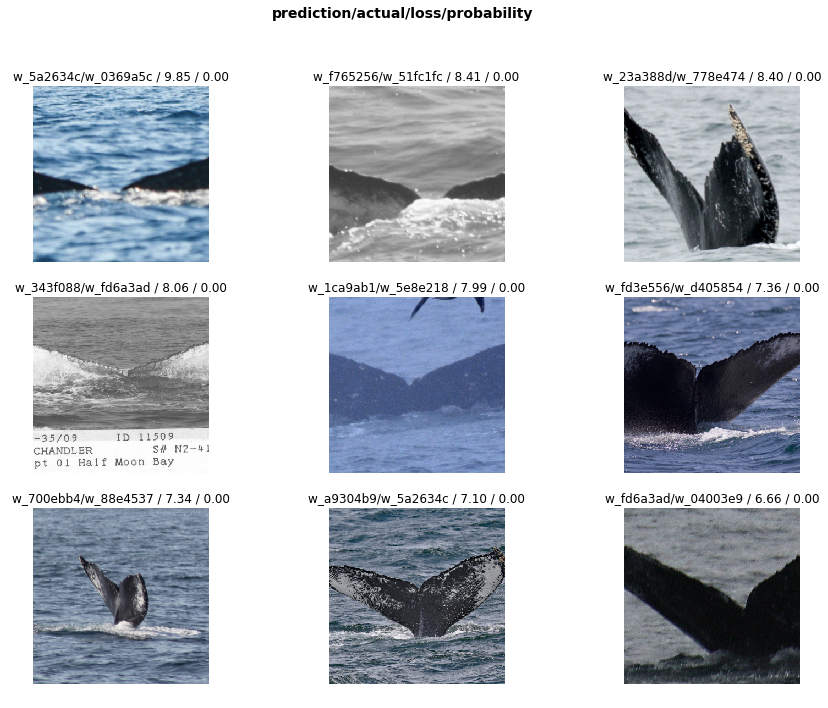

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

In [15]:
#doc(interp.plot_top_losses)

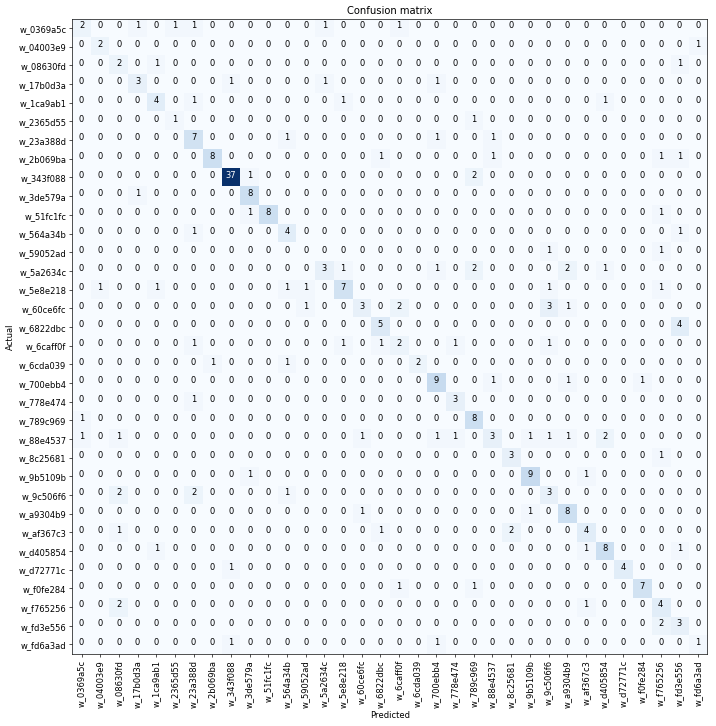

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [17]:
interp.most_confused(min_val=2)

[('w_6822dbc', 'w_fd3e556', 4), ('w_60ce6fc', 'w_9c506f6', 3)]

In [18]:

learn.unfreeze()

In [19]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.330741,1.599602,0.400000,0.600000


In [20]:

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


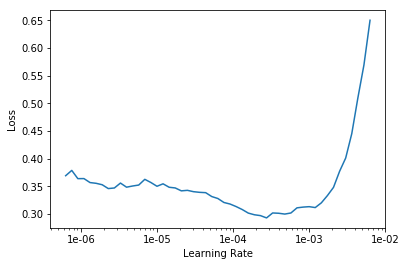

In [21]:
 learn.recorder.plot()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.317193,1.494824,0.372414,0.627586
2,0.268059,1.394343,0.355172,0.644828
3,0.204314,1.343960,0.358621,0.641379
4,0.168661,1.330925,0.358621,0.641379
5,0.145525,1.369182,0.362069,0.637931
6,0.121135,1.352091,0.344828,0.655172
7,0.103485,1.343287,0.331034,0.668966
8,0.086893,1.330316,0.327586,0.672414
9,0.071035,1.329155,0.334483,0.665517
10,0.063047,1.314540,0.327586,0.672414


In [23]:

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

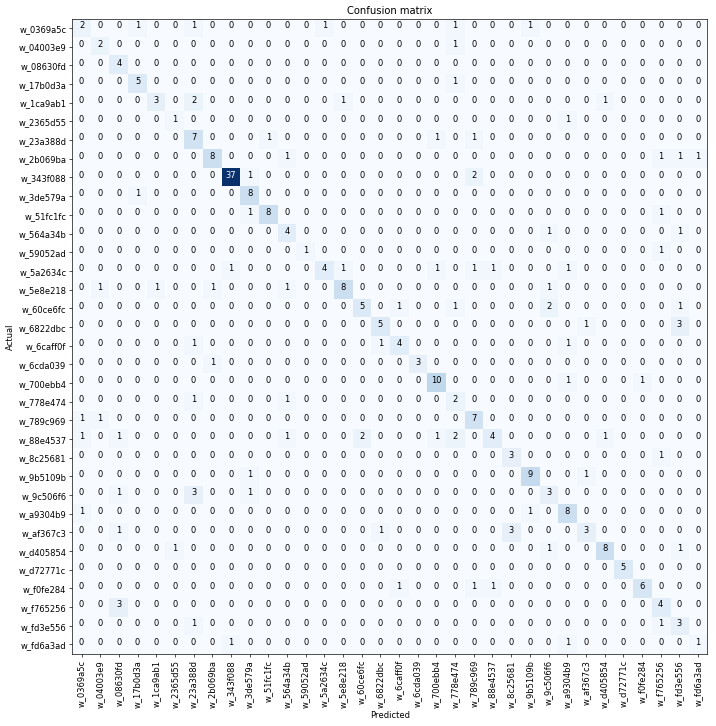

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)